In [179]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification

In [180]:
X, y = make_classification(n_features=5, n_redundant = 0, n_informative= 5, n_clusters_per_class=1)

In [181]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.438161,0.445799,-0.158485,-0.568228,2.062915,0
1,-0.963518,-1.386639,-0.679574,0.317973,0.925703,0
2,4.153641,3.519517,-1.596716,2.244490,0.204830,1
3,1.903552,2.254930,0.756865,-0.505008,-0.520161,1
4,-2.011164,-0.864877,0.573114,-2.930147,-0.886780,0


In [182]:
# function for row sampling

def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [183]:
# function for feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [184]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [185]:
df1 = sample_rows(df, 0.2)

In [186]:
df2 = sample_rows(df, 0.2)

In [187]:
df3 = sample_rows(df, 0.2)

In [188]:
df2.shape

(20, 6)

In [189]:
df1.shape

(20, 6)

In [190]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [191]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])

DecisionTreeClassifier()

In [192]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'X[0] <= 0.186\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.4, 0.5, 'X[4] <= -1.359\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

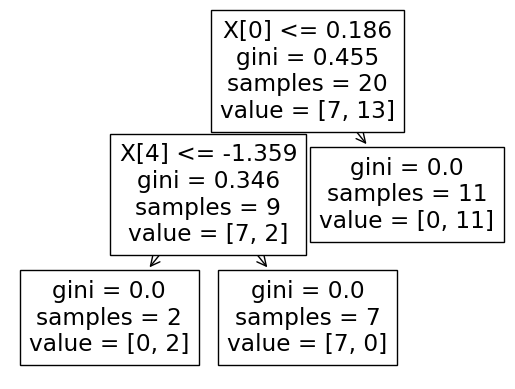

In [193]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'X[1] <= -0.559\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(0.4, 0.5, 'X[4] <= -1.187\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]')]

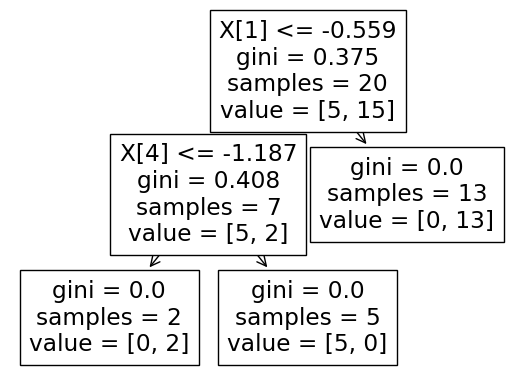

In [194]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'X[1] <= -0.199\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.4, 0.5, 'X[0] <= -2.358\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

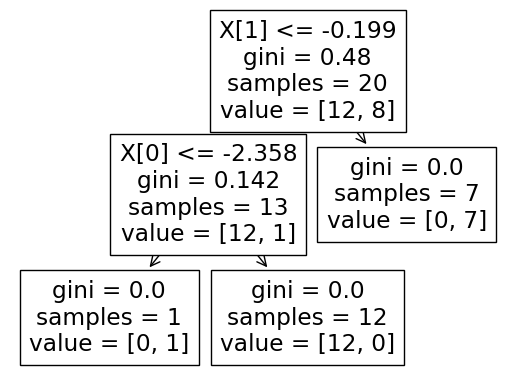

In [195]:
plot_tree(clf3)

In [196]:
clf1.predict(np.array([1.216488, -0.537439,	-3.334049,	-0.375374, 0.460904]).reshape(1, 5))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [197]:
clf2.predict(np.array([1.216488, -0.537439,	-3.334049,	-0.375374, 0.460904]).reshape(1, 5))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [198]:
clf3.predict(np.array([1.216488, -0.537439,	-3.334049,	-0.375374, 0.460904]).reshape(1, 5))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [199]:
# column sampling
sample_features(df, 0.8)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_10064\3932490370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col3,col2,col1,target
0,-0.568228,-0.158485,0.445799,0.438161,0
1,0.317973,-0.679574,-1.386639,-0.963518,0
2,2.244490,-1.596716,3.519517,4.153641,1
3,-0.505008,0.756865,2.254930,1.903552,1
4,-2.930147,0.573114,-0.864877,-2.011164,0
...,...,...,...,...,...
95,-1.501533,0.324409,-1.630915,-1.506446,0
96,-2.731835,3.303654,-2.285571,-2.390071,1
97,-1.515609,0.861434,0.391396,1.408304,1
98,-0.679366,1.786655,-0.024930,-0.459532,0


In [200]:
df1 = sample_features(df, 0.8)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_10064\3932490370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [201]:
df2 = sample_features(df, 0.8)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_10064\3932490370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [202]:
df3 = sample_features(df, 0.8)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_10064\3932490370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [203]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col4', 'col5', 'col1', 'target'], dtype='object')
Index(['col2', 'col4', 'col5', 'col1', 'target'], dtype='object')
Index(['col5', 'col1', 'col3', 'col2', 'target'], dtype='object')


In [204]:
df1.shape

(100, 5)

In [205]:
df3

,col5,col1,col3,col2,target
0,2.062915,0.438161,-0.158485,0.445799,0
1,0.925703,-0.963518,-0.679574,-1.386639,0
2,0.204830,4.153641,-1.596716,3.519517,1
3,-0.520161,1.903552,0.756865,2.254930,1
4,-0.886780,-2.011164,0.573114,-0.864877,0
...,...,...,...,...,...
95,0.303643,-1.506446,0.324409,-1.630915,0
96,-1.820948,-2.390071,3.303654,-2.285571,1
97,0.224070,1.408304,0.861434,0.391396,1
98,2.109731,-0.459532,1.786655,-0.024930,0


In [206]:
clf1.fit(df1.iloc[:, 0:3], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:3], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:3], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.43333333333333335, 0.9166666666666666, 'X[0] <= -0.199\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.13333333333333333, 0.75, 'X[2] <= -1.658\ngini = 0.282\nsamples = 53\nvalue = [44, 9]'),
 Text(0.06666666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.2, 0.5833333333333334, 'X[0] <= -0.826\ngini = 0.12\nsamples = 47\nvalue = [44, 3]'),
 Text(0.13333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.26666666666666666, 0.4166666666666667, 'X[2] <= 0.628\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.2, 0.25, 'X[1] <= -1.365\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.13333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.26666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.7333333333333333, 0.75, 'X[2] <= 1.033\ngini = 0.223\nsampl

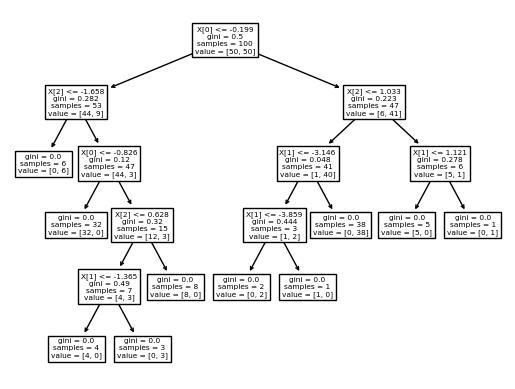

In [207]:
plot_tree(clf1)

[Text(0.43333333333333335, 0.9166666666666666, 'X[0] <= -0.199\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.13333333333333333, 0.75, 'X[2] <= -1.658\ngini = 0.282\nsamples = 53\nvalue = [44, 9]'),
 Text(0.06666666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.2, 0.5833333333333334, 'X[0] <= -0.826\ngini = 0.12\nsamples = 47\nvalue = [44, 3]'),
 Text(0.13333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.26666666666666666, 0.4166666666666667, 'X[2] <= 0.628\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.2, 0.25, 'X[1] <= -1.365\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.13333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.26666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.7333333333333333, 0.75, 'X[2] <= 1.033\ngini = 0.223\nsampl

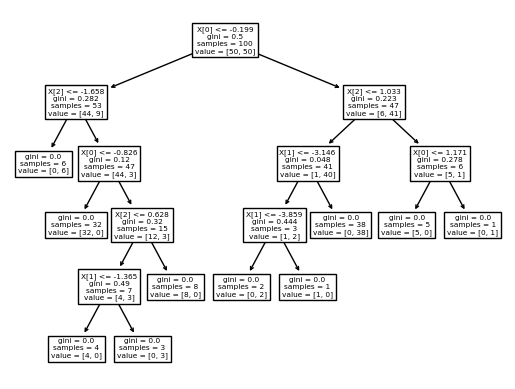

In [208]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.875, 'X[1] <= 0.039\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= -1.086\ngini = 0.363\nsamples = 63\nvalue = [48, 15]'),
 Text(0.2222222222222222, 0.375, 'X[2] <= 1.109\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(0.7777777777777778, 0.625, 'X[0] <= 1.706\ngini = 0.102\nsamples = 37\nvalue = [2, 35]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

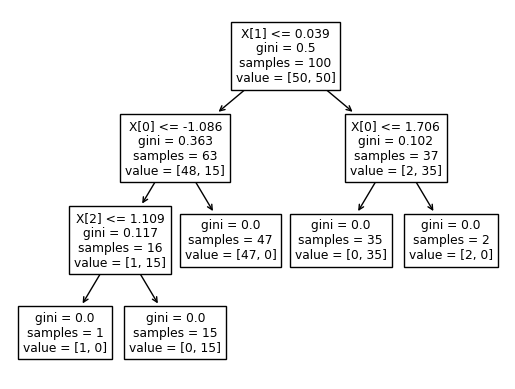

In [209]:
plot_tree(clf3)

In [210]:
clf1.predict(np.array([-1.580588, -1.010238, 1.515923]).reshape(1, 3))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [211]:
clf2.predict(np.array([-1.580588, -1.010238, 1.515923]).reshape(1, 3))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [212]:
clf3.predict(np.array([-1.580588, -1.010238, 1.515923]).reshape(1, 3))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [213]:
# combined sampling
df1 = combined_sampling(df, 0.5, 0.5)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_10064\3932490370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [214]:
df2 = combined_sampling(df, 0.5, 0.5)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_10064\3932490370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [215]:
df3 = combined_sampling(df, 0.5, 0.5)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_10064\3932490370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [221]:
df3

,col2,col3,target
41,-0.772780,0.191679,0
87,-0.881143,0.393085,0
14,-0.798028,-0.137244,0
7,2.969063,-1.731404,1
12,0.713773,-0.925632,1
25,-2.320920,1.339709,0
95,-1.630915,0.324409,0
45,0.452963,-0.105164,1
58,-0.966836,-0.042365,0
0,0.445799,-0.158485,0


In [216]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col3', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [217]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [218]:
clf1.fit(df1.iloc[:, 0:2], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:2], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:2], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.43333333333333335, 0.95, 'X[1] <= -0.536\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.36666666666666664, 0.85, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5, 0.85, 'X[0] <= -2.471\ngini = 0.474\nsamples = 44\nvalue = [27, 17]'),
 Text(0.3333333333333333, 0.75, 'X[1] <= 2.279\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.26666666666666666, 0.65, 'X[0] <= -2.924\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.75, 'X[0] <= -0.693\ngini = 0.418\nsamples = 37\nvalue = [26, 11]'),
 Text(0.5333333333333333, 0.65, 'X[0] <= -0.824\ngini = 0.48\nsamples = 25\nvalue = [15, 10]'),
 Text(0.4666666666666667, 0.55, 'X[1] <= 2.019\ngini = 0.434\nsamples = 22\nvalue = [15, 7]'),
 Text(0.3333333333333333, 0.45, 'X[1] <= 1.471\ngini = 0.32\nsamples = 

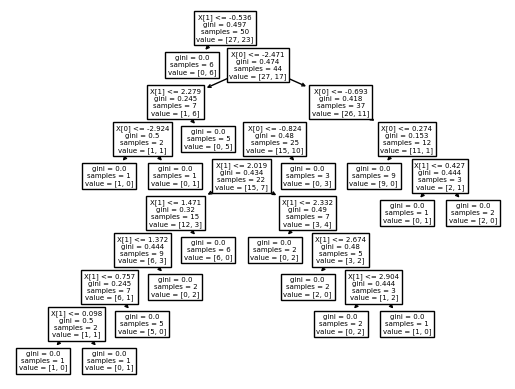

In [219]:
plot_tree(clf1)

[Text(0.5, 0.9, 'X[1] <= -0.118\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.25, 0.7, 'X[0] <= -0.976\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.5, 'X[0] <= 0.586\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.25, 0.3, 'X[0] <= 0.36\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.75, 0.7, 'X[0] <= 1.033\ngini = 0.133\nsamples = 28\nvalue = [2, 26]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

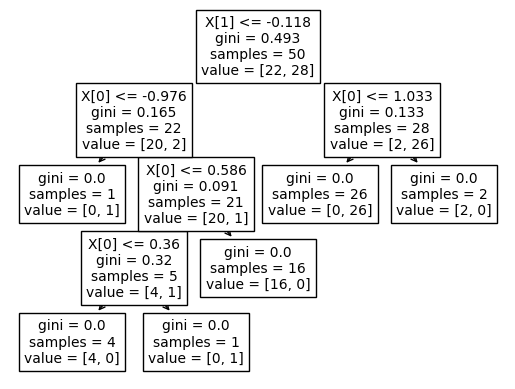

In [220]:
plot_tree(clf2)

In [223]:
clf1.predict(np.array([-0.752917, 2.151624]).reshape(1, 2))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [224]:
clf2.predict(np.array([-0.752917, 2.151624]).reshape(1, 2))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [225]:
clf3.predict(np.array([-0.752917, 2.151624]).reshape(1, 2))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])